## CytOpt on the HIPC Data

In this notebook, we apply our method ${\tt CytOpt}$ on various datasets of the HIPC panel. From our numerical experiments, the computation time to get an estimate of the class proportions with the descent-ascent procedure is between 10 and 20 minutes. With the minmax swapping procedure, this computation time is between 1 and 3 minutes.

##### How to try ${\tt CytOpt}$ on other HIPC data sets.

An HIPC data set has the following structure :

xx_y_values : Cytometry measurements 

xx_y_clust : Corresponding manual clustering

xx labels the center where the data analysis was performed.
-replace xx by W2 for Stanford .
-replace xx by D54 for NHLBI.
-replace xx by FTV for Yale.
-replace xx by IU for UCLA.
-replace xx by O0 for CIMR.
-replace xx by pw for Baylor.
-replace xx by pM for Miami.

y labels the patient and the replicate of the biological sample.
-replace y by 1 for patient 1 replicate A (except for Baylor this replicate is not available).
-replace y by 2 for patient 1 replicate B.
-replace y by 3 for patient 1 replicate C.
-replace y by 4 for patient 2 replicate A.
-replace y by 5 for patient 2 replicate B.
-replace y by 6 for patient 2 replicate C.
-replace y by 7 for patient 3 replicate A.
-replace y by 8 for patient 3 replicate B.
-replace y by 9 for patient 3 replicate C.


##### import modules and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import CytOpT.CytOpt as cytopt
import CytOpT.plots as cplt

##### import data

In [2]:
#Source Data

Stanford1A_values = pd.read_csv('../../data/W2_1_values.csv',
                                 usecols = np.arange(1,8))
Stanford1A_clust = pd.read_csv('../../data/W2_1_clust.csv',
                                usecols = [1])

#Target Data

Stanford3C_values = pd.read_csv('../../data/W2_9_values.csv',
                                 usecols = np.arange(1,8))
Stanford3C_clust = pd.read_csv('../../data/W2_9_clust.csv',
                                usecols = [1])


Miami3A_values = pd.read_csv('../../data/pM_7_values.csv', 
                             usecols = np.arange(1,8))
Miami3A_clust = pd.read_csv('../../data/pM_7_clust.csv',
                            usecols = [1])


Ucla2B_values = pd.read_csv('../../data/IU_5_values.csv',
                            usecols = np.arange(1,8))
Ucla2B_clust = pd.read_csv('../../data/IU_5_clust.csv',
                           usecols = [1])

Preprocessing of the source data

In [3]:
X_source = np.asarray(Stanford1A_values)
Lab_source = np.asarray(Stanford1A_clust['x'])

#### Target data : Stanford3C

Preprocessing of the target data

In [4]:
X_target = np.asarray(Stanford3C_values)
Lab_target = np.asarray(Stanford3C_clust['x'])

Computation of the benchmark class proportions

In [5]:
h_true = np.zeros(10)
for k in range(10):
    h_true[k] = np.sum(Lab_target == k+1)/len(Lab_target)
    
Lab_target

array([ 1,  1,  1, ..., 10, 10, 10])

##### Descent-ascent procedure

Setting of the parameters for the descent-ascent procedure.

In [6]:
n_it_grad = 5000
n_it_sto = 10
pas_grad = 10
eps=0.0005
monitoring=False

In [7]:
t0 = time.time()
h_hat1 = cytopt.CytOpT(X_source, X_target, Lab_source,thetaTrue=h_true,
                      method="desasc",nItGrad=n_it_grad,nItSto=n_it_sto,stepGrad=pas_grad,eps=eps,
                      monitoring=monitoring)
elapsed_time = time.time() - t0

Running Desent-ascent optimization...
Iteration  0
Current h_hat
[0.10029683 0.1007061  0.09920702 0.09968007 0.09899591 0.09746223
 0.10049881 0.10052135 0.10098735 0.10164432]
Iteration  1000
Current h_hat
[0.06995242 0.09488553 0.05092162 0.06245256 0.02506044 0.00720463
 0.38118918 0.19218563 0.08853393 0.02761407]
Iteration  2000
Current h_hat
[0.06157028 0.08803279 0.04088277 0.04923897 0.01990597 0.00534977
 0.34835031 0.25958095 0.1080342  0.01905398]
Iteration  3000
Current h_hat
[0.06621694 0.09771971 0.04187398 0.05286489 0.0168886  0.00479563
 0.32129191 0.27645102 0.10536666 0.01653065]
Iteration  4000
Current h_hat
[0.05571815 0.10170284 0.03687739 0.05074915 0.01365826 0.00393184
 0.36879113 0.22784971 0.12713131 0.01359023]
Done ( 477.957 s)
Done ( 477.9704873561859 s)



In [8]:
print('Elapsed_time :', elapsed_time/60, 'mins')

Elapsed_time : 7.966356114546458 mins


In [9]:
h_hat1 = h_hat1['proportions']
h_hat1

,GoldStandard,desasc
0,0.016490,0.053089
1,0.130506,0.107127
2,0.049117,0.037746
3,0.057538,0.055847
4,0.009776,0.012703
5,0.003239,0.003546
6,0.335159,0.368574
7,0.270289,0.230791
8,0.106596,0.117827
9,0.021290,0.012750


##### Minmax swapping procedure

parameters setting for the second procedure

In [10]:
lbd = 0.0001
eps_two = 0.0001
n_iter = 5000
step_size = 5
power = 0.99

In [11]:
t0 = time.time()
results = cytopt.CytOpT(X_source, X_target, Lab_source, thetaTrue=h_true,
                             method="minmax",lbd=lbd,eps=eps_two,nIter=n_iter,step=step_size,power=power)
elapsed_time = time.time() - t0

Running MinMax optimization...
Done ( 28.787 s)
Done ( 28.801419973373413 s)



In [12]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  0.4804134209950765 Mins


In [13]:
h_hat2 = results['proportions']
h_hat2

,GoldStandard,minmax
0,0.016490,0.024052
1,0.130506,0.116961
2,0.049117,0.043551
3,0.057538,0.047040
4,0.009776,0.013906
5,0.003239,0.006388
6,0.335159,0.390165
7,0.270289,0.271123
8,0.106596,0.081321
9,0.021290,0.005493


In [14]:
h_hat1['minmax'] = h_hat2['minmax']
h_hat1

,GoldStandard,desasc,minmax
0,0.016490,0.053089,0.024052
1,0.130506,0.107127,0.116961
2,0.049117,0.037746,0.043551
3,0.057538,0.055847,0.047040
4,0.009776,0.012703,0.013906
5,0.003239,0.003546,0.006388
6,0.335159,0.368574,0.390165
7,0.270289,0.230791,0.271123
8,0.106596,0.117827,0.081321
9,0.021290,0.012750,0.005493


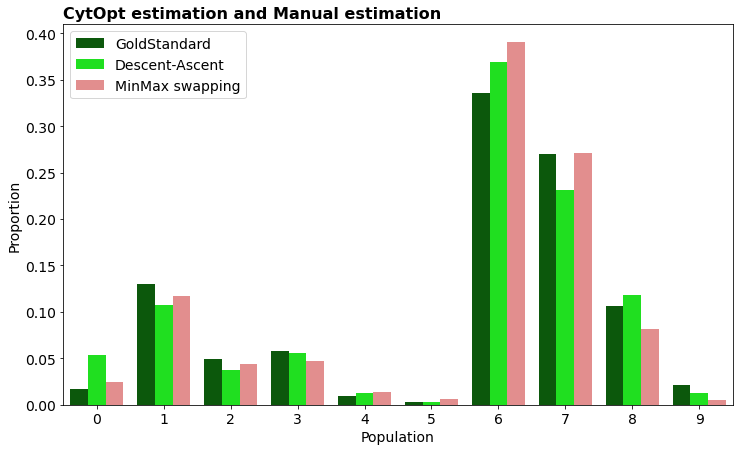

In [15]:
cplt.barPlot(h_hat1)